In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import os

os.getcwd()

da = pd.read_csv("dataset/nhanes_2015_2016.csv")

In [2]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [3]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "Less than 9th grade", 2: "9-11th grade (Includes 12th grade with no diploma)", 
                                       3: "High school graduate/GED or equivalent", 4: "Some college or AA degree", 5: "College graduate or above",
                                      9:"Don't know"})
da.DMDEDUC2x.value_counts()

Some college or AA degree                             1621
College graduate or above                             1366
High school graduate/GED or equivalent                1186
Less than 9th grade                                    655
9-11th grade (Includes 12th grade with no diploma)     643
Don't know                                               3
Name: DMDEDUC2x, dtype: int64

In [4]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                       6: "Living with partner", 77: "Refused", 9: "Don't know"}).fillna("Missing")
da.DMDMARTLx.value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [5]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points

In [6]:
da.rename(columns={'agegrp':'Age','RIAGENDRx': 'Gender', 'DMDEDUC2x': 'Education level','DMDMARTLx':'Maritial Status'}, inplace=True)

In [7]:
da1 = da[['Age','Gender','Education level','Maritial Status']].copy()

In [8]:
da1['Education level'].value_counts()

Some college or AA degree                             1621
College graduate or above                             1366
High school graduate/GED or equivalent                1186
Less than 9th grade                                    655
9-11th grade (Includes 12th grade with no diploma)     643
Don't know                                               3
Name: Education level, dtype: int64

This leads us into the question of, what is our research question. We'll be looking at what factors influenced the highest education level

In [9]:
dx = da1.loc[~da1['Education level'].isin(["Don't know"]), :]  # Eliminate rare/missing values

In [10]:
dx1 = dx.groupby('Education level')['Gender'].value_counts()

In [11]:
dx1.unstack() # Restructure the results from 'long' to 'wide'

Gender,Female,Male
Education level,,
9-11th grade (Includes 12th grade with no diploma),291,352
College graduate or above,717,649
High school graduate/GED or equivalent,583,603
Less than 9th grade,349,306
Some college or AA degree,909,712


In [12]:
dx2 = dx1.unstack()

In [13]:
dx2_row = dx2.sum(axis=1)

In [14]:
dx2['Total']= dx2_row 

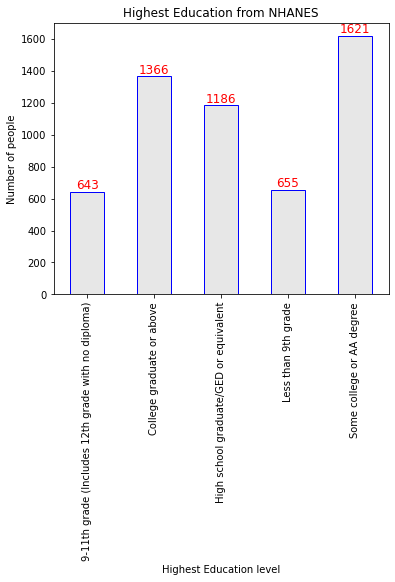

In [24]:
ax =dx2['Total'].plot(kind='bar', title='Highest Education from NHANES', xlabel='Highest Education level',
         ylabel='Number of people', color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue',figsize=(6, 5))


ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=12)

plt.show()

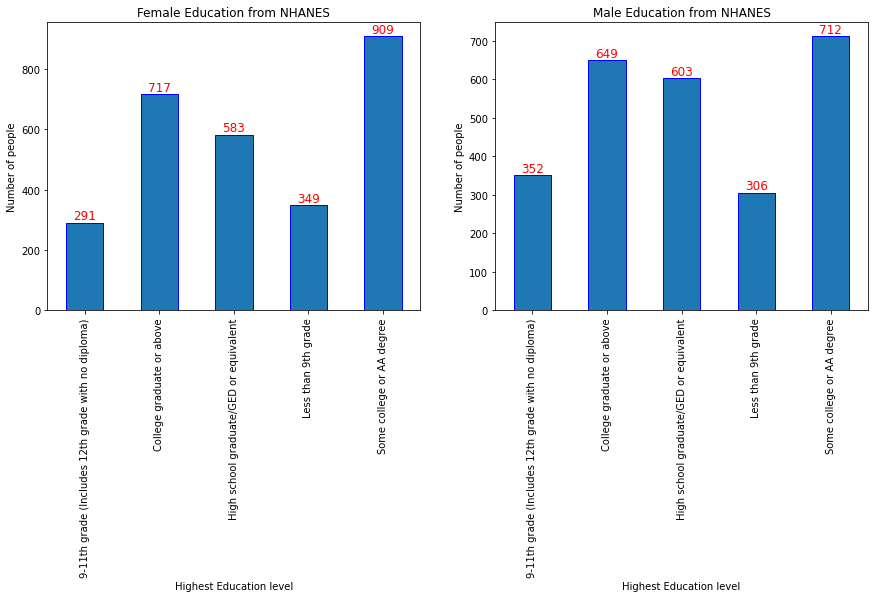

In [38]:
plt.subplots_adjust(left=0.1, bottom=0.1, right=2, top=0.9, wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
ax =dx2['Female'].plot(kind='bar', title='Female Education from NHANES', xlabel='Highest Education level',
         ylabel='Number of people',  edgecolor='blue',figsize=(6, 5))


ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=12)


plt.subplot(1, 2, 2)
ax =dx2['Male'].plot(kind='bar', title='Male Education from NHANES', xlabel='Highest Education level',
         ylabel='Number of people',  edgecolor='blue',figsize=(6, 5))


ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=12)

plt.show()

In [44]:
x_axis = np.arange(len(dx2['Total']))

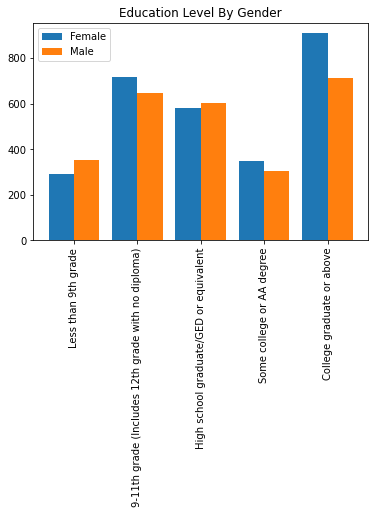

In [48]:
# Multi bar Chart
lab = ["Less than 9th grade", "9-11th grade (Includes 12th grade with no diploma)",
"High school graduate/GED or equivalent","Some college or AA degree", "College graduate or above"]
plt.bar(x_axis -0.2, dx2['Female'], width=0.4, label = 'Female')
plt.bar(x_axis +0.2, dx2['Male'], width=0.4, label = 'Male')

# Xticks

plt.xticks(x_axis, lab)
plt.xticks(rotation=90)

# Add legend

plt.legend()
plt.title("Education Level By Gender")

# Display

plt.show()

In [114]:
dx2

Gender,Female,Male,Total
Education level,,,
9-11th grade (Includes 12th grade with no diploma),291,352,643
College graduate or above,717,649,1366
High school graduate/GED or equivalent,583,603,1186
Less than 9th grade,349,306,655
Some college or AA degree,909,712,1621
Total,2849,2622,5471


In [112]:
dx0 = dx2.sum(axis=0)

In [113]:
dx2.loc['Total'] = dx0

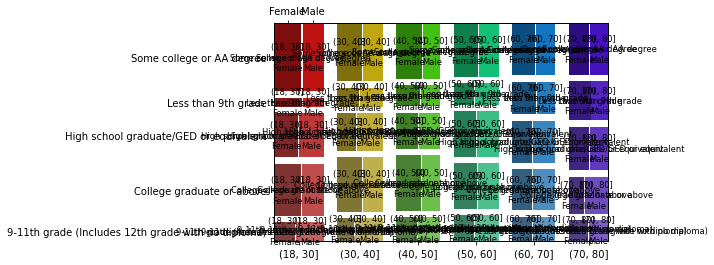

In [108]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(dx, index =['Age', 'Education level','Gender'],gap=0.05)
plt.show()

Mosaic Plot (also known as Marimekko diagram)is nothing but a further version of (pd.crosstab()) function in python. Crosstab function just gives us a table of numbers whereas Mosaic Plot gives it’d graphical diagram which we can use in the data analysis report.

In [107]:
myCrosstable = pd.crosstab(dx['Age'],dx['Education level'])

In [105]:
myCrosstable

Education level,9-11th grade (Includes 12th grade with no diploma),College graduate or above,High school graduate/GED or equivalent,Less than 9th grade,Some college or AA degree
Age,,,,,
"(18, 30]",99,278,237,47,364
"(30, 40]",111,264,182,93,282
"(40, 50]",112,260,171,98,262
"(50, 60]",122,220,220,104,258
"(60, 70]",111,188,192,149,238
"(70, 80]",88,156,184,164,217


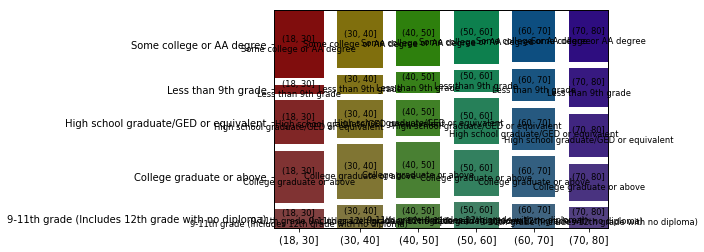

In [104]:
mosaic(myCrosstable.stack(), gap=0.05)
plt.show()

<img src="image\5.png" alt="Hist2">


<img src="image\6.png" alt="Hist3">


<img src="image\7.png" alt="Hist3">


<img src="image\8.png" alt="Hist4">

<img src="image\9.png" alt="Hist6">

<img src="image\10.png" alt="Hist7">

A bicycle rental company has counted the number of bicycle rentals in each season (spring, summer, fall, winter) for the past two years. 


Additionally, the company has collected weather data (temperature, wind speed and humidity).


Use the data for bicycle rentals and weather presented in the tables and graphs below to answer these practice quiz questions.

**Which proportion describes the most popular season for renting bicycles in Year 1?**

In [118]:
data = {'Year 1': [150000,347316, 419650, 326137], 
        'Year 2': [321348,571273,641479, 515476],
       }  
  
# Create DataFrame  
df = pd.DataFrame(data,columns = ['Year 1','Year 2']) 

In [119]:
d_row = df.sum(axis=1)
df['Total']= d_row 
df0 = df.sum(axis=0)
df.loc['Total'] = df0

In [124]:
df

,Year 1,Year 2,Total
0,150000,321348,471348
1,347316,571273,918589
2,419650,641479,1061129
3,326137,515476,841613
Total,1243103,2049576,3292679


**Question 8**


The company wants to consider how weather patterns affect the bicycle rentals.  They first consider how the measured temperature compares to the apparent temperature, or the temperature that humans perceive it to be.  The temperatures have been normalized to fall on a scale between 0 and 1.  Yesterday the normalized real temperature was 0.4.  Today the normalized real temperature is 0.8.  Which day would you expect to have a higher apparent temperature?

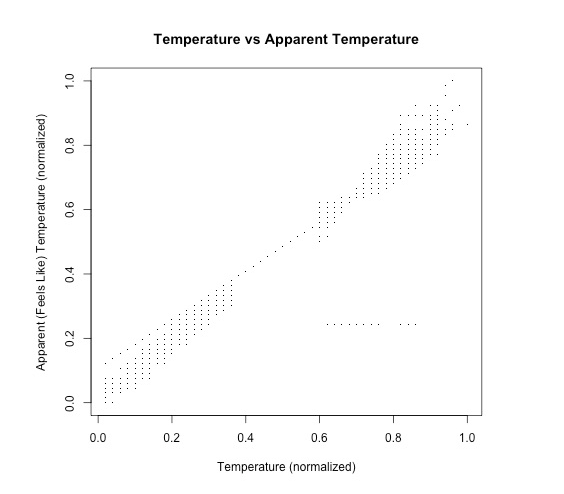

Today. Because the scatterplot has a positive direction, we expect the apparent temperature to be larger when the actual temperature is larger.


**A mean is not shown in boxplots, although the median is.**
